In [2]:
import sys, platform, os
import matplotlib
from matplotlib import pyplot as plt
import numpy as np

#Assume installed from github using "git clone --recursive https://github.com/cmbant/CAMB.git"
#This file is then in the docs folders
#camb_path = os.path.realpath(os.path.join(os.getcwd(),'..'))
#sys.path.insert(0,camb_path)
import camb
#from camb import model, initialpower
print('Using CAMB %s installed at %s'%(camb.__version__,os.path.dirname(camb.__file__)))

Using CAMB 1.3.4 installed at /home/emile/Bureau/stage_M1/CAMB-feature-custom-xe/camb


Binage de la fonction tangente hyperbolique

class: <TanhReionization>
 Reionization = True
 use_optical_depth = False
 use_custom_xe = True
 redshift = 10.0
 optical_depth = 0.0
 delta_redshift = 0.5
 fraction = -1.0
 include_helium_fullreion = True
 helium_redshift = 3.5
 helium_delta_redshift = 0.4
 helium_redshiftstart = 5.5
 tau_solve_accuracy_boost = 1.0
 timestep_boost = 1.0
 max_redshift = 50.0
 num_a = 250
 a = [1.0, 0.9090909090909091, 0.8333333333333334, 0.7692307692307692, 0.7142857142857143, 0.6666666666666666, 0.625, ...]
 xe = [1.1637685599848535, 1.1637685586510091, 1.1637685564518714, 1.1637685528261064, 1.1637685468482313, 1.1637685369923831, 1.1637685207428423, ...]
 

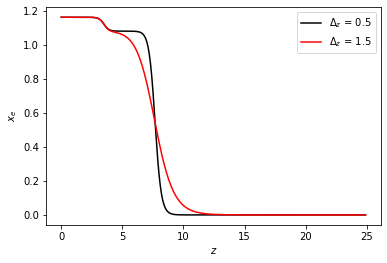

In [14]:
cmb_params = {'omch2': 0.120, 
          'ombh2': 0.0224,'H0': 67.4,'As': 10**-10*np.exp(3.047),'ns': 0.965,'tau': 0.054}
camb_params = camb.set_params(**cmb_params)
camb_params.Reion.set_xe


def xe(z, tau=0.0544, dz=0.5, f=1.08, with_helium=False):
    He_fraction = 8.1884281020483535E-002
    y = (1+z)**(3/2)
    cmb_params = {'omch2': 0.120, 
          'ombh2': 0.0224,'H0': 67.4,'As': 10**-10*np.exp(3.047),'ns': 0.965,'tau': 0.054}
    camb_params = camb.set_params(**cmb_params)
    zre = camb.get_zre_from_tau(camb_params, tau)
    yre = (1+zre)**(3/2)
    dy = 3/2 * (1 + z)**(1/2) * dz   
    xe = (1+He_fraction)/2 * (1 + np.tanh((yre - y) / dy))  
    # Effect of Helium becoming fully ionized is small so details not important
    
    He_redshift = 3.5
    He_delta = 0.4
    xe += He_fraction / 2 * (1 + np.tanh((He_redshift - z)/He_delta))   
    #xe += He_fraction  * (1 + np.tanh((He_redshift - z)/He_delta))   
    return xe
z = np.arange(0, 25, 0.1)
fig, ax = plt.subplots()
ax.plot(z, xe(z=z), label=r"$\Delta_z$ = 0.5", c="black")
ax.plot(z, xe(z=z, dz=1.5), label=r"$\Delta_z$ = 1.5", c="red")
ax.set(ylabel="$x_e$", xlabel="$z$")
plt.savefig('reio_tanh.png')
ax.legend();

z = np.arange(0, 25, 0.1)
xe_resultat = xe(z)
model = camb.TanhReionization()
model.set_xe(xe_resultat,z)


<ipython-input-4-e976513c7614>:107: RuntimeWarning: invalid value encountered in true_divide
  ax[0,0].plot(ls,np.abs(totCl[debut:,0]-totCl_old[debut:,0])/totCl_old[debut:,0], color='k')
<ipython-input-4-e976513c7614>:111: RuntimeWarning: invalid value encountered in true_divide
  ax[1,0].plot(ls,np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1], color='k')
<ipython-input-4-e976513c7614>:116: RuntimeWarning: invalid value encountered in true_divide
  ax[1,1].plot(ls,np.abs(totCl[debut:,3]-totCl_old[debut:,3])/totCl_old[debut:,3], color='k')
<ipython-input-4-e976513c7614>:120: RuntimeWarning: invalid value encountered in true_divide
  ax[0,1].plot(ls,np.abs(totCl[debut:,2]-totCl_old[debut:,2])/totCl_old[debut:,2], color='k')


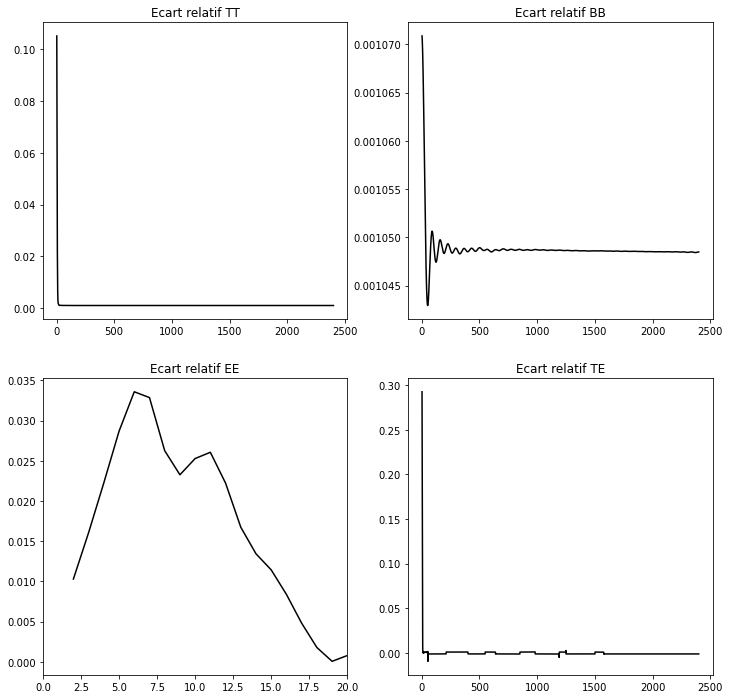

In [4]:
cmb_params = {'omch2': 0.120, 
          'ombh2': 0.0224,'H0': 67.4,'As': 10**-10*np.exp(3.047),'ns': 0.965}#,'tau': 0.054}

cmb_params2 = {'omch2': 0.120, 
          'ombh2': 0.0224,'H0': 67.4,'As': 10**-10*np.exp(3.047),'ns': 0.965,'tau': 0.054}

liste = ['omch2','ombh2','H0','As','ns','optical_depth']

camb_params = camb.set_params(**cmb_params,Reion=model)
camb_params_old = camb.set_params(**cmb_params2)

results = camb.get_results(camb_params)
results_old = camb.get_results(camb_params_old
                              )
powers =results.get_cmb_power_spectra(camb_params, CMB_unit='muK')
powers_old =results.get_cmb_power_spectra(camb_params_old, CMB_unit='muK')

totCl = powers['total']
totCl_old = powers_old['total']


def get_deriv_new(parameter):
    if parameter == 'As':
        stepsize = 10**(-11)
    if parameter != 'As':
        stepsize = 0.01
    cmb_params_l = cmb_params.copy()
    cmb_params_r = cmb_params.copy()
    cmb_params_l[parameter] = cmb_params[parameter]-stepsize
    cmb_params_r[parameter] = cmb_params[parameter]+stepsize
    pars_left = camb.set_params(**cmb_params_l,Reion=model)
    pars_right = camb.set_params(**cmb_params_r,Reion=model)
    result_left = camb.get_results(pars_left)
    result_right = camb.get_results(pars_right)
    powers_left =result_left.get_cmb_power_spectra(pars_left, CMB_unit='muK')
    powers_right =result_right.get_cmb_power_spectra(pars_right, CMB_unit='muK')
    cl_left = powers_left['total']
    cl_right = powers_right['total']
    cl_tt_left = cl_left[:,0]
    cl_tt_right = cl_right[:,0]
    cl_te_left = cl_left[:,3]
    cl_te_right = cl_right[:,3]
    cl_ee_left = cl_left[:,1]
    cl_ee_right = cl_right[:,1]
    cl_bb_left = cl_left[:,2]
    cl_bb_right = cl_right[:,2]
    
    dCltt_dh = (cl_tt_right - cl_tt_left) / (2 * stepsize)
    dClte_dh = (cl_te_right - cl_te_left) / (2 * stepsize)
    dClee_dh = (cl_ee_right - cl_ee_left) / (2 * stepsize)
    dClbb_dh = (cl_bb_right - cl_bb_left) / (2 * stepsize)
    return dCltt_dh,dClte_dh,dClee_dh,dClbb_dh
    

def get_deriv_new_old(parameter):
    if parameter == 'As':
        stepsize = 10**(-11)
    if parameter != 'As':
        stepsize = 0.01
    cmb_params_l = cmb_params2.copy()
    cmb_params_r = cmb_params2.copy()
    cmb_params_l[parameter] = cmb_params[parameter]-stepsize
    cmb_params_r[parameter] = cmb_params[parameter]+stepsize
    pars_left = camb.set_params(**cmb_params_l)
    pars_right = camb.set_params(**cmb_params_r)
    result_left = camb.get_results(pars_left)
    result_right = camb.get_results(pars_right)
    powers_left =result_left.get_cmb_power_spectra(pars_left, CMB_unit='muK')
    powers_right =result_right.get_cmb_power_spectra(pars_right, CMB_unit='muK')
    cl_left = powers_left['total']
    cl_right = powers_right['total']
    cl_tt_left = cl_left[:,0]
    cl_tt_right = cl_right[:,0]
    cl_te_left = cl_left[:,3]
    cl_te_right = cl_right[:,3]
    cl_ee_left = cl_left[:,1]
    cl_ee_right = cl_right[:,1]
    cl_bb_left = cl_left[:,2]
    cl_bb_right = cl_right[:,2]
    
    dCltt_dh = (cl_tt_right - cl_tt_left) / (2 * stepsize)
    dClte_dh = (cl_te_right - cl_te_left) / (2 * stepsize)
    dClee_dh = (cl_ee_right - cl_ee_left) / (2 * stepsize)
    dClbb_dh = (cl_bb_right - cl_bb_left) / (2 * stepsize)
    return dCltt_dh,dClte_dh,dClee_dh,dClbb_dh
    
    
stepsize = 0.01
#res = get_deriv_new(liste[2])
#res_old = get_deriv_new(liste[2])

"""
#plt.plot(ls,100*(res[0][debut:]/totCl[debut:,0]-res_old[0][debut:]/totCl_old[debut:,0])/(res_old[0][debut:]/totCl_old[debut:,0]))#,label= "%.3f"%params['omega_cdm'])
plt.plot(ls,100*(totCl[debut:,0]-totCl_old[debut:,0])/totCl[debut:,0])
#plt.plot(totCl[debut:,0],label='bin')
#plt.plot(totCl_old[debut:,0],label='tau')
plt.ylabel('Ecart relatif',fontsize = 13)
#plt.legend(fontsize=13)
plt.show()
#plt.plot(ls,res_old[0][debut:]/totCl_old[debut:,0])
plt.ylabel(r'$(\partial C_{\ell}^{TT} / \partial \Omega_{cdm} ) / C_{\ell}^{TT}$',fontsize=20)
plt.show()
"""
debut=0
ls = np.arange(debut,2401,1)
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,np.abs(totCl[debut:,0]-totCl_old[debut:,0])/totCl_old[debut:,0], color='k')
#ax[0,0].plot(ls,totCl_old[:,0], color='r',label=r'$\tau$')
ax[0,0].set_title('Ecart relatif TT')
#ax[0,0].legend(fontsize=13)
ax[1,0].plot(ls,np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1], color='k')
#ax[1,0].plot(ls,totCl_old[:,1], color='r',label=r'$\tau$')
ax[1,0].set_title('Ecart relatif EE')
ax[1,0].set_xlim(0,20)
#ax[1,0].legend(fontsize=13)
ax[1,1].plot(ls,np.abs(totCl[debut:,3]-totCl_old[debut:,3])/totCl_old[debut:,3], color='k')
#ax[1,1].plot(ls,totCl_old[:,3], color='r',label=r'$\tau$')
ax[1,1].set_title('Ecart relatif TE');
#ax[1,1].legend(fontsize=13)
ax[0,1].plot(ls,np.abs(totCl[debut:,2]-totCl_old[debut:,2])/totCl_old[debut:,2], color='k')
#ax[0,1].plot(ls,totCl_old[:,2], color='r',label=r'$\tau$')
ax[0,1].set_title('Ecart relatif BB');
#ax[0,1].legend(fontsize=13)


On regarde EE à bas $\ell$

In [ ]:
def xe2(z,zre=8, tau=0.0544, dz=0.5, f=1.08, with_helium=False):
    He_fraction = 8.1884281020483535E-002
    y = (1+z)**(3/2)
    #zre = camb.get_zre_from_tau(camb_params, tau)
    yre = (1+zre)**(3/2)
    dy = 3/2 * (1 + z)**(1/2) * dz   
    xe = (1+He_fraction)/2 * (1 + np.tanh((yre - y) / dy))  
    # Effect of Helium becoming fully ionized is small so details not important
    
    He_redshift = 3.5
    He_delta = 0.4
    xe += He_fraction / 2 * (1 + np.tanh((He_redshift - z)/He_delta))   
    #xe += He_fraction  * (1 + np.tanh((He_redshift - z)/He_delta))   
    return xe

cmb_params = {'omch2': 0.120, 
          'ombh2': 0.0224,'H0': 67.4,'As': 10**-10*np.exp(3.047),'ns': 0.965}#,'tau': 0.054}

cmb_params2 = {'omch2': 0.120, 
          'ombh2': 0.0224,'H0': 67.4,'As': 10**-10*np.exp(3.047),'ns': 0.965,'tau': 0.054}


figure = plt.figure(figsize=(10,10))
zre = np.arange(7,9.5,0.5)
for i in range(5):
    z = np.arange(0, 25, 0.5)
    xe_resultat = xe2(z,zre=zre[i])
    model = camb.TanhReionization()
    model.set_xe(xe_resultat,z)
    camb_params = camb.set_params(**cmb_params,Reion=model)
    camb_params_old = camb.set_params(**cmb_params2)

    results = camb.get_results(camb_params)
    results_old = camb.get_results(camb_params_old)
    powers =results.get_cmb_power_spectra(camb_params, CMB_unit='muK')
    powers_old =results.get_cmb_power_spectra(camb_params_old, CMB_unit='muK')

    totCl = powers['total'] 
    totCl_old = powers_old['total']
    
    plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label=zre[i])
    plt.title('Ecart relatif EE, variation $z_{rei}$(%) ',fontsize=13)
    plt.xlim(2,20)
    plt.yscale('log')
    #plt.ylim(0,0.1)
    plt.xlabel('$\ell$',fontsize=20)
    plt.legend(fontsize=13)
plt.show()




<ipython-input-21-fad8fe700020>:41: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label=zre[i])


<ipython-input-20-8bf88aebe6fb>:22: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])
<ipython-input-20-8bf88aebe6fb>:22: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])
<ipython-input-20-8bf88aebe6fb>:22: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])
<ipython-input-20-8bf88aebe6fb>:22: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])
<ipython-input-20-8bf88aebe6fb>:22: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])


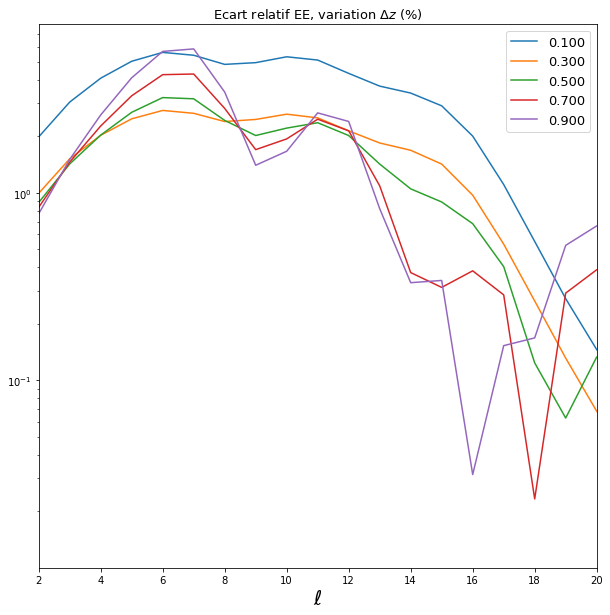

In [20]:
cmb_params = {'omch2': 0.120, 
          'ombh2': 0.0224,'H0': 67.4,'As': 10**-10*np.exp(3.047),'ns': 0.965}#,'tau': 0.054}

delta_z = np.arange(0.1,1.5,0.2)
figure = plt.figure(figsize=(10,10))
for i in range(5):
    z = np.arange(0, 25, 0.5)
    xe_resultat = xe(z,dz=delta_z[i])
    model = camb.TanhReionization()
    model.set_xe(xe_resultat,z)
    camb_params = camb.set_params(**cmb_params,Reion=model)
    camb_params_old = camb.set_params(**cmb_params2)

    results = camb.get_results(camb_params)
    results_old = camb.get_results(camb_params_old)
    powers =results.get_cmb_power_spectra(camb_params, CMB_unit='muK')
    powers_old =results.get_cmb_power_spectra(camb_params_old, CMB_unit='muK')

    totCl = powers['total'] 
    totCl_old = powers_old['total']
    
    plt.plot(ls,100*np.abs(totCl[debut:,1]-totCl_old[debut:,1])/totCl_old[debut:,1],label="%.3f"%delta_z[i])
    plt.title('Ecart relatif EE, variation $\Delta z$ (%)',fontsize=13)
    plt.xlim(2,20)
    plt.yscale('log')
    plt.xlabel('$\ell$',fontsize=20)
    #plt.ylim(0,0.1)
    plt.legend(fontsize=13)
plt.show()

In [6]:
#paramètres Litebird
sT = 2.8 * (np.pi/60./180.)*10**(-6)
sP = sT * np.sqrt(2.)
theta_FWHM =80 * (np.pi/60./180.)
#paramètres Planck
"""
sT = 33 * (np.pi/60./180.)*10**(-6)
sP = sT * np.sqrt(2.)
theta_FWHM =7. * (np.pi/60./180.)
"""



'\nsT = 33 * (np.pi/60./180.)*10**(-6)\nsP = sT * np.sqrt(2.)\ntheta_FWHM =7. * (np.pi/60./180.)\n'

In [7]:


def noise(s,l):
    return s**2*np.exp(l*(l+1)*theta_FWHM**2/(8*np.log(2)))

#à modifier pour que cela fonctionne
def Fisher_noise_ij(param1,param2,f_sky): 
    F_ij = 0
    if param1==param2:
        res1 = get_deriv_new(param1)
        res2 = res1
    if param1 != param2:
        res1 = get_deriv_new(param1)
        res2 = get_deriv_new(param2)
    results = camb.get_results(camb_params)
    powers =results.get_cmb_power_spectra(camb_params, CMB_unit='muK')
    totCL=powers['total']
    for l in range(2,2000):
        mat_cl = np.zeros((2,2))
        matder1 = np.zeros((2,2))
        matder2 = np.zeros((2,2))
        mat_cl[0,0] = totCL[l,0]+noise(sT,l)
        mat_cl[0,1] = totCL[l,3]
        mat_cl[1,0] = totCL[l,3]
        mat_cl[1,1] = totCL[l,1]+noise(sP,l)
        
        matder1[0,0] = res1[0][l]
        matder1[0,1] = res1[1][l]
        matder1[1,0] = res1[1][l]
        matder1[1,1] = res1[2][l]
        
        matder2[0,0] = res2[0][l]
        matder2[0,1] = res2[1][l]
        matder2[1,0] = res2[1][l]
        matder2[1,1] = res2[2][l]
        inv_cl = np.linalg.inv(mat_cl)
        F_ij += (2*l+1)*f_sky/2*np.trace(np.dot(np.dot(inv_cl,matder1),np.dot(inv_cl,matder2)))
    return F_ij


In [8]:
#retourne la matrice de Fisher avec bruit
def Full_Fisher_noise():
    f_sky = 1
    liste = ['omch2','ombh2','H0','As','ns','optical_depth']
    Fisher = np.zeros((6,6))
    for i in range(6):
        for j in range(6):
            Fisher[i,j] = Fisher_noise_ij(liste[i],liste[j],f_sky)
            print(i,j)

    return Fisher

In [ ]:
Full_Fisher_noise()

In [ ]:
eigenvalue = np.linalg.eig(a)
nombre = np.shape(eigenvalue)[0]

plt.plot(nombre,-np.sort(-eigenvalue))
plt.xlabel('Numero valeur propre',fontsize=13)
plt.ylabel('Valeur propre',fontsize=13)